# Paso 1: Analisis exploratorio de los datos FASE 5

Importamos las Bibliotecas Necesarias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

Cargamos los datos del dataset Titanic-Dataset.csv

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")


Vializamos la informacion de las tablas del dataset


In [3]:

print(data.head())
print(data.info())
print(data.describe()) 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

Visualizamos la relacion entre las variables


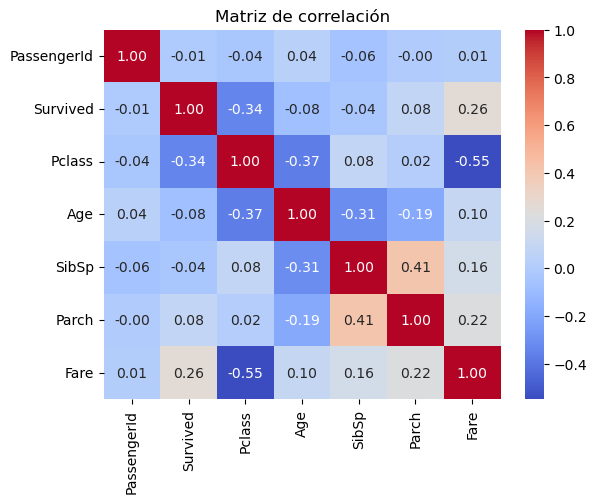

In [ ]:
# Seleccionar solo las columnas numéricas para calcular la correlación
numeric_data = data.select_dtypes(include=[np.number])

# Matriz de correlación
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()



Distribución de edades por genero

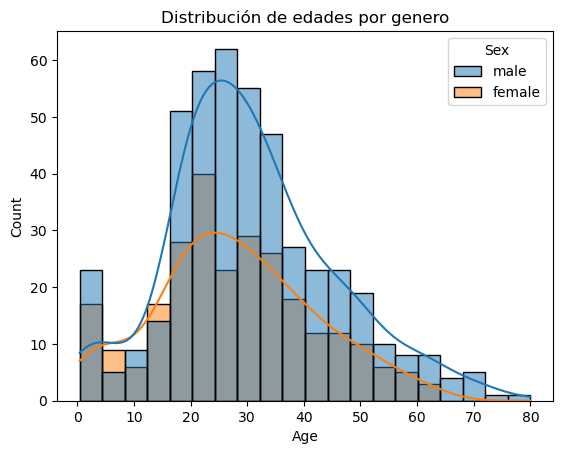

In [8]:

sns.histplot(data=data, x="Age", hue="Sex", kde=True)
plt.title("Distribución de edades por genero")
plt.show()


# Paso 2: Preprocesamiento de los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


Imprimimos para identificar los valores faltantes

In [ ]:
print(data.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


Eliminamos los valores faltantes en Age con la mediana

In [13]:
data['Age'] = data['Age'].fillna(data['Age'].median())


Eliminamos las columnas irrelevantes o con demasiados valores faltantes


In [19]:
columns_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

Eliminamos las filas con valores faltantes en Embarked

In [20]:
data = data.dropna(subset=['Embarked'])


Convertimos las variables categoricas a numericas

In [ ]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Imprimos nuevamente para verificar los valores faltantes

In [22]:
print(data.isnull().sum())


Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


# Paso 3: Seleccionamos las Caracteristicas más relevantes para entrenar el modelo utilizando selección de características.

Identificamos la correlación con la variable objetivo 'Survived'


In [23]:
correlations = data.corr()['Survived'].sort_values(ascending=False)
print(correlations)

Survived    1.000000
Sex         0.541585
Fare        0.255290
Parch       0.083151
SibSp      -0.034040
Age        -0.069822
Embarked   -0.169718
Pclass     -0.335549
Name: Survived, dtype: float64


Seleccionamos las características relevantes


In [24]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = data[features]
y = data['Survived']

# Paso 4: Dividir el dataset en Train y Test para evaluar correctamente el modelo.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")


Tamaño del conjunto de entrenamiento: (711, 7)
Tamaño del conjunto de prueba: (178, 7)


# Paso 5: Entrenamos el modelo configurando los diferentes hiperparámetros.

Entrenamos un modelo de regresión logística

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Imprimimos los coeficientes del modelo


In [27]:
print(f"Coeficientes del modelo: {model.coef_}")
print(f"Intercepto: {model.intercept_}")


Coeficientes del modelo: [[-1.10503671e+00  2.64618476e+00 -4.30576630e-02 -3.75256402e-01
  -6.13735436e-02  1.71700561e-03 -2.68736218e-01]]
Intercepto: [2.87777667]


# Paso 6: Evaluamos el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [ ]:
# Predicciones
y_pred = model.predict(X_test)



In [30]:
# Calculo de métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

NameError: name 'accuracy_score' is not defined

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       109
           1       0.68      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178
weighted avg       0.78      0.78      0.78       178



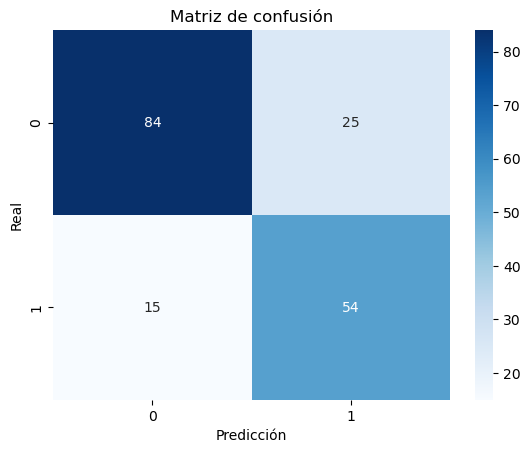

In [ ]:


# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
